# Postprocessing functions

Use these in the database folder -- the one containing all of the session folders. This assumes that you have compiled the database file, `database.csv`

### 1. Load database and lookup

In [1]:
import pandas as pd
df_scrambam = pd.read_csv("database.csv")
df_scrambam.head()

,session,run_id,filename,formula,elements,supercell size,image distance (target),image distance (actual),sample size,relaxer,connectivity_done,properties_done,provenance,source_folder
0,S.1.basic5,S.1.1,DoublePerov,Cs1Sn0.5Pb0.5I3,"['Cs', 'Sn', 'Pb', 'I']","[3, 3, 3]",15.0,17.77485,400.0,CHGNET,True,True,Andy,S.1.basic5
1,S.1.basic5,S.1.2,Gehlenite,Ca2Al2SiO7,"['Ca', 'Al' ,'Si', 'O']","[2, 2, 3]",15.0,15.26700,400.0,CHGNET,True,True,Ohkotnikov,S.1.basic5
2,S.1.basic5,S.1.3,Hanada-P1,In4.8Cu1.6Se8,"['In', 'Cu', 'Se']","[3, 3, 2]",15.0,17.28000,400.0,CHGNET,True,True,Hanada,S.1.basic5
3,S.1.basic5,S.1.4,Verkelis,In2.68Te4,"['In', 'Te']","[3, 3, 3]",15.0,18.48900,400.0,CHGNET,True,True,ICSD,S.1.basic5
4,S.1.basic5,S.1.5,Spinel-113,V10.6672Zn10.72O32,"['V', 'Zn', 'O']","[2, 2, 2]",15.0,16.79400,400.0,CHGNET,True,True,Andy,S.1.basic5


In [2]:
this_run = "S.1.1"
df_scrambam.loc[df_scrambam['run_id'] == this_run]

,session,run_id,filename,formula,elements,supercell size,image distance (target),image distance (actual),sample size,relaxer,connectivity_done,properties_done,provenance,source_folder
0,S.1.basic5,S.1.1,DoublePerov,Cs1Sn0.5Pb0.5I3,"['Cs', 'Sn', 'Pb', 'I']","[3, 3, 3]",15.0,17.77485,400.0,CHGNET,True,True,Andy,S.1.basic5


In [5]:
from virp.database import GetPath
GetPath(df_scrambam, "S.1.1")

WindowsPath('S.1.basic5/DoublePerov')

### 2. Count redundant virtual cells (no_stropt folders)

In [12]:
from virp.enumerate import EquivalentStructures
from virp.database import GetPath
from pathlib import Path

# Replace with your run_id
run_id = "S.1.1"

# Print some details
run_path = GetPath(df_scrambam, run_id)
print("Run: ", str(run_path))

# Run the redundancy check
csv_file = run_path / Path("no_stropt") / Path("VirtualLibrary.csv")
num_overlaps = EquivalentStructures(csv_file)

Run:  S.1.basic5\DoublePerov
Number of redundant structures: 27/400 (6.75%)


### 3. Enumerate Permutations

In [20]:
from virp.enumerate import Enumerate
from virp.database import GetPath
from pathlib import Path

# Replace with your run_id
run_id = "S.1.3"

# Print some details
run_path = GetPath(df_scrambam, run_id)
print("Run: ", str(run_path))

# Run the enumeration
cif_file = run_path / Path(df_scrambam.loc[df_scrambam['run_id'] == run_id, 'filename'].iloc[0]+"_supercell.cif")
Enumerate(cif_file)

Run:  S.1.basic5\Hanada-P1
Input supercell .cif file:  S.1.basic5\Hanada-P1\Hanada-P1_supercell.cif
Disordered site name:  In
- Number of sites in supercell:  36
- Element and occupancy:  [('In', 0.4)]
- Raw permutations:  3.719933e+41 ( 36 !)
- Snap:  [14, 36]
- No. of combinations:  3.796297e+09
Disordered site name:  Cu
- Number of sites in supercell:  36
- Element and occupancy:  [('Cu', 0.8)]
- Raw permutations:  3.719933e+41 ( 36 !)
- Snap:  [29, 36]
- No. of combinations:  8.34768e+06
Total number of combinations for S.1.basic5\Hanada-P1\Hanada-P1_supercell.cif :  3.169027e+16


31690274210496000

### 4. Draw Histogram of Materials Properties

Run:  S.4.Martin\maricite
Histogram saved to histograms.png


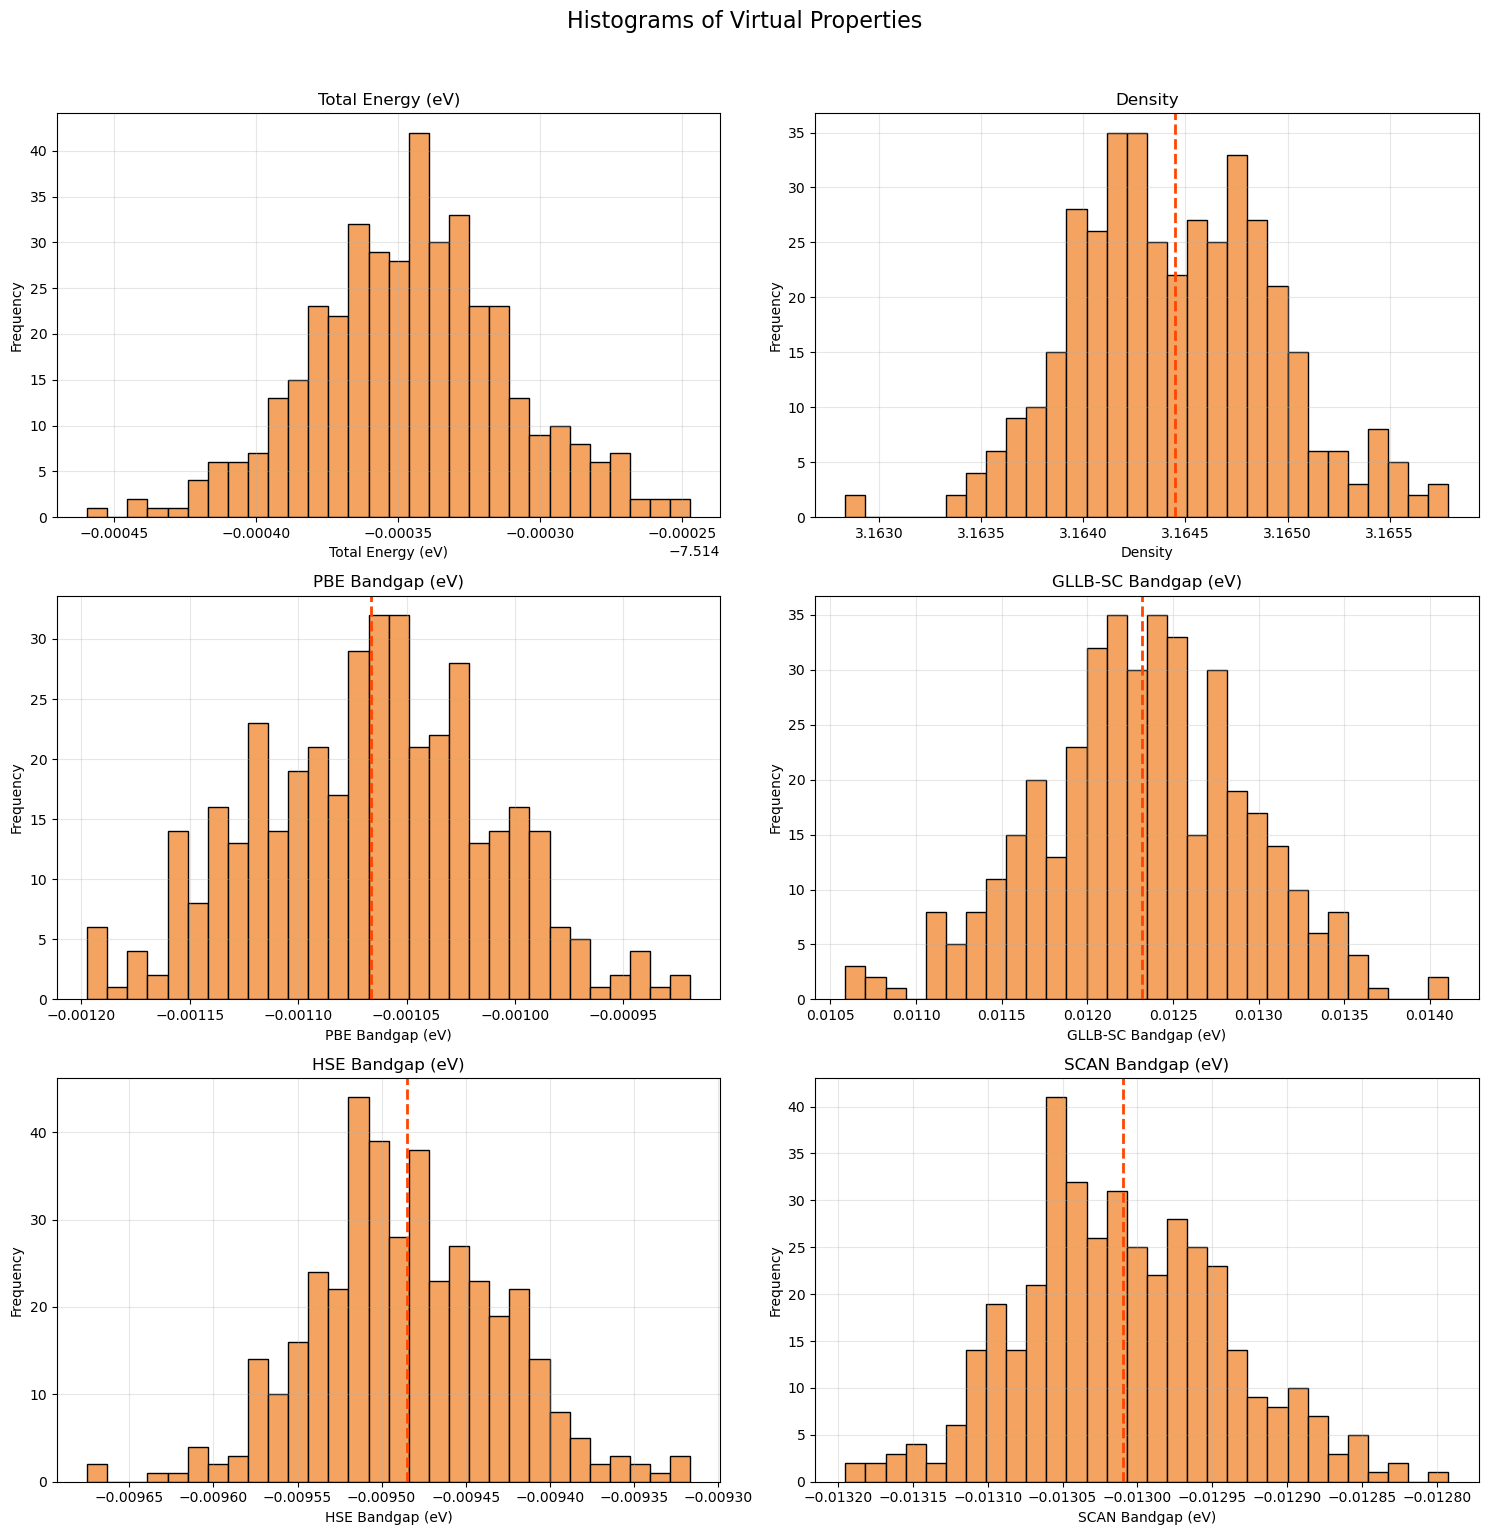

In [2]:
from virp.matprop import Histograms
from virp.database import GetPath

# Replace with your run_id
run_id = "S.4.2"

# Print some details
run_path = GetPath(df_scrambam, run_id)
print("Run: ", str(run_path))

# Produce histograms
Histograms(run_path, output_path = "histograms.png")

Run:  S.5.ice-N100\Ice-Ih-119913
Scatterplots saved as connectivity_analysis.png


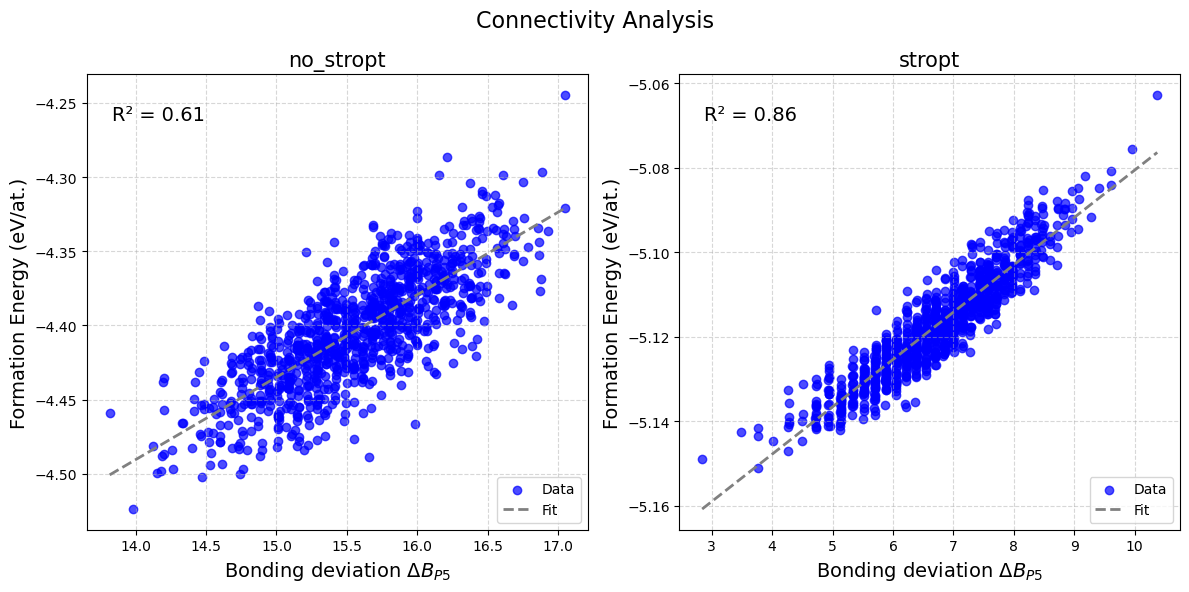

In [2]:
from virp.connect import ConnectivityQuery
from virp.database import GetPath

# Replace with your run_id
run_id = "S.5.1"

# Print some details
run_path = GetPath(df_scrambam, run_id)
print("Run: ", str(run_path))

# Query connectivity, draw graphs
ConnectivityQuery(run_path)